<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Bioinformatics/blob/master/orIC_prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of replication origins by calculating DNA structural properties

Dataset Obtained from http://lin-group.cn/server/iORI-PseKNC2.0/index.html

In [6]:
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/positive-sequences.txt
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/negative-sequences.txt
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/90_sdandard.txt

--2021-01-15 14:43:10--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/positive-sequences.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123928 (121K) [text/plain]
Saving to: ‘positive-sequences.txt’

positive-sequences. 100%[===================>] 121.02K  --.-KB/s    in 0.02s   

2021-01-15 14:43:10 (7.30 MB/s) - ‘positive-sequences.txt’ saved [123928/123928]

--2021-01-15 14:43:10--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/negative-sequences.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting respon

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np

In [8]:
parameters=open("/content/90_sdandard.txt")
data_parameters=pd.read_csv(parameters,delimiter="\t")

In [9]:
data_parameters.head()

,Physicochemical properties,GG,GA,GC,GT,AG,AA,AC,AT,CG,CA,CC,CT,TG,TA,TC,TT
0,Base stacking,-0.07,-0.65,-2.46,-0.92,0.49,1.02,-0.92,0.57,-0.58,0.57,-0.07,0.49,0.57,1.60,-0.65,1.02
1,Protein induced deformability,0.36,-0.14,-0.30,-0.83,-0.89,-0.64,-0.83,-1.05,2.23,1.51,0.36,-0.89,1.51,0.42,-0.14,-0.64
2,B-DNA twist,-0.06,1.11,0.79,-0.65,-1.33,0.00,-0.65,2.09,-1.14,0.60,-0.06,-1.33,0.60,-1.06,1.11,0.00
3,Dinucleotide GC Content,1.37,0.00,1.37,0.00,0.00,-1.37,0.00,-1.37,1.37,0.00,1.37,0.00,0.00,-1.37,0.00,-1.37
4,A-philicity,-1.19,1.02,0.32,-1.36,-0.80,0.99,-1.36,-0.10,-0.27,1.19,-1.19,-0.80,1.19,0.32,1.02,0.99


In [10]:
data_parameters.describe()

,GG,GA,GC,GT,AG,AA,AC,AT,CG,CA,CC,CT,TG,TA,TC,TT
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.222222,-0.022333,0.375333,0.145000,-0.178000,0.020111,0.180333,0.056889,0.052889,-0.237667,0.168889,-0.138111,-0.260222,-0.415889,-0.039889,0.068889
std,0.952184,0.548620,1.207512,0.918965,0.697511,0.957133,0.907413,1.197706,1.294959,0.864546,0.973112,0.703265,0.866836,1.261291,0.555800,0.916169
min,-1.690000,-1.370000,-2.460000,-2.100000,-1.750000,-2.020000,-2.100000,-2.380000,-2.870000,-1.970000,-1.690000,-1.750000,-1.970000,-2.370000,-1.370000,-2.020000
25%,-0.530000,-0.390000,-0.395000,-0.560000,-0.617500,-0.770000,-0.490000,-0.877500,-1.035000,-0.860000,-0.660000,-0.552500,-0.897500,-1.370000,-0.407500,-0.692500
50%,0.155000,-0.035000,0.335000,0.125000,-0.125000,0.050000,0.145000,-0.050000,-0.040000,-0.245000,0.030000,-0.120000,-0.300000,-0.680000,-0.035000,0.075000
75%,1.080000,0.277500,1.370000,0.970000,0.150000,0.587500,1.000000,1.022500,1.335000,0.245000,1.050000,0.215000,0.280000,0.382500,0.277500,0.650000
max,2.080000,1.230000,2.520000,1.660000,1.590000,2.520000,1.660000,3.160000,2.360000,2.010000,2.080000,1.590000,2.010000,3.420000,1.230000,2.200000


In [11]:
positive_sequences=open("/content/positive-sequences.txt","r")
negative_sequences=open("/content/negative-sequences.txt","r")

In [12]:
p_data=positive_sequences.readlines()
n_data=negative_sequences.readlines()

In [42]:
len(p_data)+len(n_data)

1622

In [43]:
p_data=p_data[1::2]
n_data=n_data[1::2]

In [110]:
x_data=[]
y_data=[]
for seq in range(len(p_data)):
  seq_data=np.zeros(90)
  for pos in range(0,298):
    seq_data+=np.array(data_parameters[p_data[seq][pos:pos+2]])
  x_data.append(seq_data)
  y_data.append(1) 

In [111]:
for seq in range(len(n_data)):
  seq_data=np.zeros(90)
  for pos in range(0,298):
    seq_data+=np.array(data_parameters[n_data[seq][pos:pos+2]])
  x_data.append(seq_data)
  y_data.append(0) 

# Data Exploration

In [112]:
y_data=np.array(y_data)

In [62]:
zz=pd.DataFrame(X,columns=np.array(data_parameters["Physicochemical properties"]))
zz["result"]=MinMaxScaler().fit_transform(y_data.reshape(-1,1))

In [63]:
zz.head()

,Base stacking,Protein induced deformability,B-DNA twist,Dinucleotide GC Content,A-philicity,Propeller twist,Duplex stability-free energy,Duplex stability-disrupt energy,DNA denaturation,Bending stiffness,Protein DNA twist,Stabilising energy of Z-DNA,Aida_BA_transition,Breslauer_dG,Breslauer_dH,Breslauer_dS,Electron_interaction,Hartman_trans_free_energy,Helix-Coil_transition,Ivanov_BA_transition,Lisser_BZ_transition,Polar_interaction,SantaLucia_dG,SantaLucia_dH,SantaLucia_dS,Sarai_flexibility,Stability,Stacking_energy,Sugimoto_dG,Sugimoto_dH,Sugimoto_dS,Watson-Crick_interaction,Twist,Tilt,Roll,Shift,Slide,Rise,Stacking energy,Bend,...,Melting Temperature,Mobility to bend towards major groove,Mobility to bend towards minor groove,Propeller Twist,Clash Strength,Enthalpy,Free energy,Twist_twist,Tilt_tilt,Roll_roll,Twist_tilt,Twist_roll,Tilt_roll,Shift_shift,Slide_slide,Rise_rise,Shift_slide,Shift_rise,Slide_rise,Twist_shift,Twist_slide,Twist_rise,Tilt_shift,Tilt_slide,Tilt_rise,Roll_shift,Roll_slide,Roll_rise,Slide stiffness,Shift stiffness,Roll stiffness,Rise stiffness,Tilt stiffness,Twist stiffness,Wedge,Direction,Flexibility_slide,Flexibility_shift,Entropy,result
0,0.274463,0.433288,0.487459,0.695652,0.701166,0.426490,0.337523,0.574981,0.696862,0.599985,0.649856,0.398882,0.408615,0.589623,0.395746,0.353615,0.695652,0.229821,0.586839,0.701166,0.231588,0.695652,0.721495,0.516785,0.512940,0.018101,0.801163,0.723836,0.669037,0.573974,0.496438,0.695652,0.720417,0.920108,0.824916,0.785151,0.167739,0.775072,0.158296,0.012972,...,0.725599,0.353443,0.663356,0.307640,0.709601,0.426026,0.307995,0.471050,0.898003,0.829520,0.337522,0.513374,0.111331,0.621512,0.235002,0.436217,0.667682,0.464558,0.159098,0.270865,0.359063,0.104400,0.262602,0.717878,0.495720,0.313015,0.534433,0.415087,0.167739,0.785151,0.824916,0.775072,0.920108,0.720417,0.927568,0.605354,0.421813,0.629141,0.493281,1.0
1,0.770883,0.207075,0.701968,0.183575,0.890407,0.133968,0.838179,0.148709,0.180664,0.144933,0.739193,0.812151,0.253384,0.164598,0.281985,0.479954,0.183575,0.749502,0.159361,0.890407,0.749321,0.183575,0.202745,0.376907,0.696597,0.581241,0.260695,0.228098,0.170514,0.206680,0.212149,0.183575,0.680505,0.428250,0.466459,0.599395,0.814922,0.431003,0.260966,0.649936,...,0.212232,0.814014,0.183962,0.180952,0.121993,0.793320,0.811795,0.645973,0.494438,0.617712,0.755835,0.890838,0.763290,0.531202,0.681385,0.716263,0.728401,0.555276,0.518326,0.687059,0.583298,0.374693,0.870523,0.165033,0.273517,0.740717,0.244948,0.278236,0.814922,0.599395,0.466459,0.431003,0.428250,0.680505,0.704180,0.293969,0.791070,0.251935,0.801581,1.0
2,0.519552,0.432220,0.426569,0.454106,0.708688,0.302832,0.527654,0.500626,0.475881,0.397302,0.727125,0.563617,0.419854,0.484970,0.569892,0.655267,0.454106,0.511410,0.480500,0.708688,0.511712,0.454106,0.494337,0.619023,0.774235,0.332947,0.470369,0.479747,0.475567,0.517793,0.504464,0.454106,0.525271,0.564103,0.569024,0.638400,0.522265,0.509557,0.197711,0.469055,...,0.490134,0.488239,0.424347,0.298335,0.403881,0.482207,0.525394,0.581957,0.590403,0.609041,0.657092,0.638456,0.615062,0.595871,0.507851,0.431603,0.719031,0.625253,0.595037,0.667639,0.448133,0.257283,0.542364,0.386959,0.354441,0.652262,0.389711,0.455688,0.522265,0.638400,0.569024,0.509557,0.564103,0.525271,0.707762,0.704123,0.625113,0.519407,0.530866,1.0
3,0.413209,0.451738,0.547927,0.574879,0.650893,0.442913,0.476366,0.449109,0.547426,0.476792,0.533501,0.502796,0.458338,0.452027,0.367306,0.409480,0.574879,0.399897,0.451161,0.650893,0.401718,0.574879,0.550046,0.352492,0.439091,0.379693,0.624055,0.585731,0.525348,0.454823,0.397369,0.574879,0.586643,0.566352,0.455063,0.481984,0.356627,0.643362,0.363398,0.347578,...,0.568693,0.430424,0.507662,0.315823,0.617227,0.545177,0.427454,0.478084,0.545771,0.447232,0.303411,0.585824,0.194859,0.376690,0.310160,0.405306,0.627483,0.330121,0.383068,0.246936,0.572512,0.454332,0.438418,0.742382,0.584986,0.308706,0.418000,0.582337,0.356627,0.481984,0.455063,0.643362,0

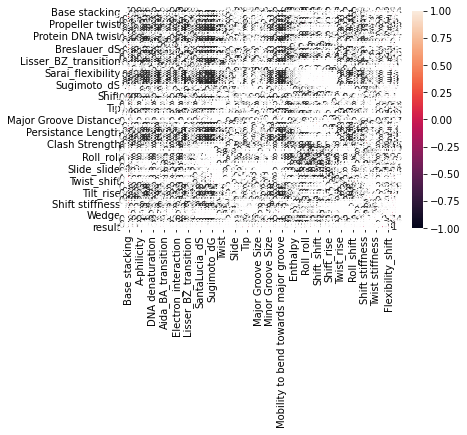

In [64]:
import seaborn as sn
corrMatrix = zz.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [65]:
result_corr=pd.Series(corrMatrix["result"])

In [71]:
np.argsort(np.abs(np.array(result_corr)))

array([58, 78, 67, 69, 38, 49, 76, 12, 10, 74, 86, 61, 45, 63, 82, 37, 89,
       75, 24, 85, 46, 39, 27,  0, 84, 32, 87, 42, 71, 43, 26, 17, 20, 66,
        5, 47, 55, 88, 59, 40, 70, 83, 33, 51, 81, 34, 16,  3, 31, 21, 80,
       35, 57, 48, 44, 54, 41,  1, 73,  4, 19, 22,  8, 65, 28, 36, 79,  6,
       77,  2, 72, 11,  9, 50, 25, 52, 53, 23, 15, 62, 56, 29, 18, 13, 68,
        7, 30, 64, 60, 14, 90])

In [114]:
from sklearn.utils import shuffle
X, y = shuffle(x_data, y_data)
from sklearn.preprocessing import MinMaxScaler
X=MinMaxScaler().fit_transform(X)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

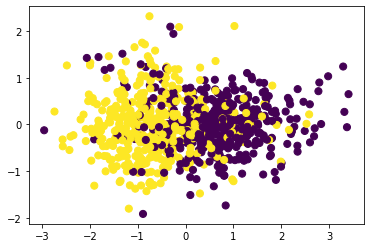

In [73]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(X)
x_pca=pca.transform(X)
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,marker="o",s=50)

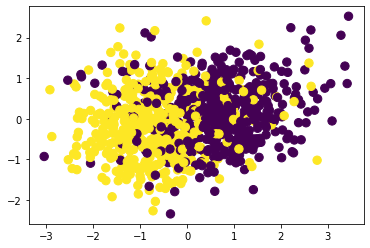

In [74]:
from sklearn.manifold import MDS
mds=MDS(n_components=2)
x_mds=mds.fit_transform(X)
plt.scatter(x_mds[:,0],x_mds[:,1],c=y,marker="o",s=70)

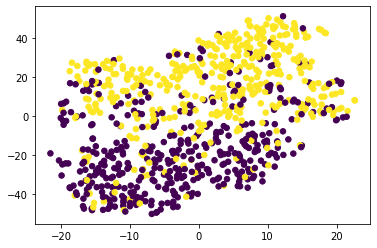

In [75]:
from sklearn.manifold import TSNE
tsne=TSNE(random_state=0)
x_tsne=tsne.fit_transform(X)
plt.scatter(x_tsne[:,0],x_tsne[:,1],c=y,s=30)

# Supervised ML 

In [76]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
degree=2
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg_scaled.fit(X,y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [78]:
np.mean((polyreg_scaled.predict(x_test)-y_test)**2)

0.22624522883717607

In [79]:
np.mean((linear_reg.predict(x_test)-y_test)**2)

0.13572255576529155

In [80]:
from sklearn.linear_model import Lasso
linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(x_train, y_train)
np.mean((linlasso.predict(x_test)-y_test)**2)

0.2502626889128551

In [81]:
from sklearn.svm import LinearSVC
#for c in range(5):
#  clf = LinearSVC(C=10**c).fit(x_train, y_train)
#  print(np.mean((clf.predict(x_test)-y_test)**2))
svc = LinearSVC(C=10**3,max_iter=10000).fit(x_train, y_train)
print(np.mean((svc.predict(x_test)-y_test)**2))

0.3170731707317073


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [82]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier().fit(x_train,y_train)
print(np.mean((clf.predict(x_test)-y_test)**2))

0.23170731707317074


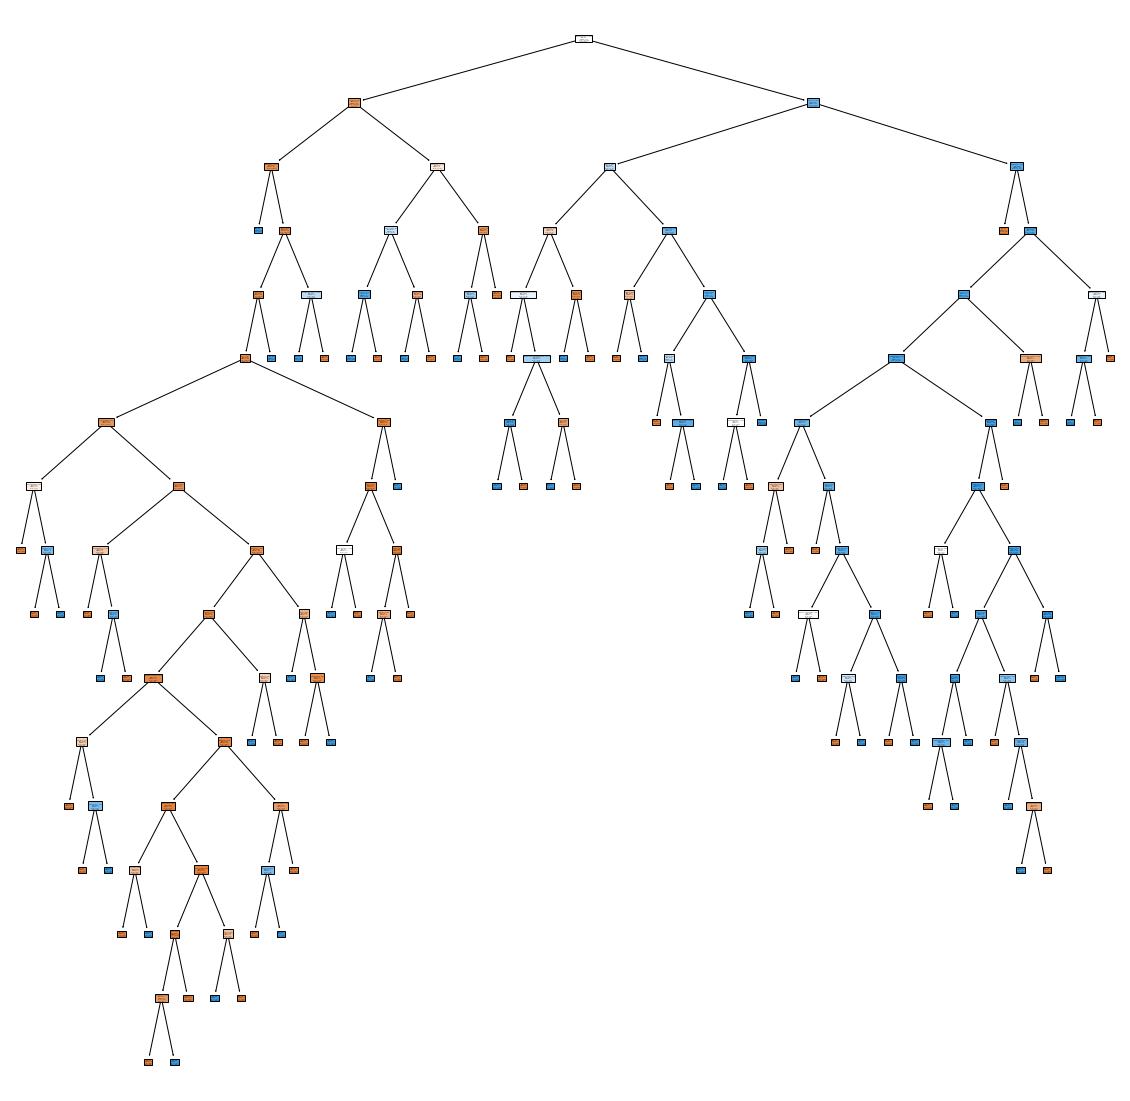

In [83]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf, 
                   feature_names=np.array(data_parameters["Physicochemical properties"]),  
                   class_names=["true","false"],
                   filled=True)
plt.show()

In [84]:
y_train=np.array(y_train)

In [86]:
len(y_train)

729

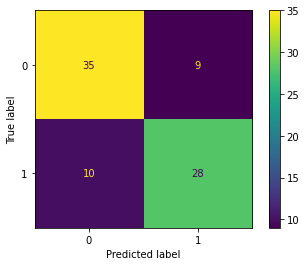

In [91]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()  

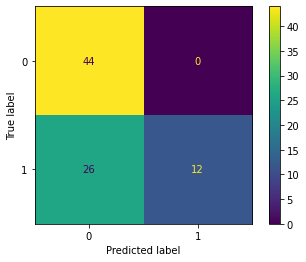

In [92]:
plot_confusion_matrix(svc, x_test, y_test)  
plt.show()

# Deep Neural Networks

In [115]:
import tensorflow as tf
import tensorflow.keras as keras
model=keras.Sequential([
   keras.layers.Dense(1024,input_shape=(90,),activation=tf.nn.relu),
   keras.layers.Dense(512,activation=tf.nn.relu),
   keras.layers.Dense(5,activation=tf.nn.softmax)                     
])
model.summary()
model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy")
history=model.fit(x_train,y_train,epochs=10,batch_size=10)
model.evaluate(x_test,np.array(y_test))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 1024)              93184     
_________________________________________________________________
dense_28 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_29 (Dense)             (None, 5)                 2565      
Total params: 620,549
Trainable params: 620,549
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
73/73 [==============================] - 1s 7ms/step - loss: 0.6482
Epoch 2/10
73/73 [==============================] - 1s 7ms/step - loss: 0.4750
Epoch 3/10
73/73 [==============================] - 1s 7ms/step - loss: 0.4804
Epoch 4/10
73/73 [==============================] - 1s 7ms/step - loss: 0.4571
Epoch 5/10
73/73 [==============================] - 1s 7ms/st

0.47781452536582947

In [93]:
x_data=[]
y_data=[]
for seq in range(len(p_data)):
  seq_data=[]
  for pos in range(0,298):
    seq_data.append(np.array(data_parameters[p_data[seq][pos:pos+2]]))
  x_data.append(seq_data)
  y_data.append(1)
for seq in range(len(n_data)):
  seq_data=[]
  for pos in range(0,298):
    seq_data.append(np.array(data_parameters[n_data[seq][pos:pos+2]]))
  x_data.append(seq_data)
  y_data.append(0) 

In [94]:
x_data=np.array(x_data)
y_data=np.array(y_data)

In [95]:
x_data.shape,y_data.shape

((811, 298, 90), (811,))

In [96]:
from sklearn.utils import shuffle
X, y = shuffle(x_data, y_data)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [97]:
x_train.shape,x_test.shape

((729, 298, 90), (82, 298, 90))

In [98]:
x_train=x_train.reshape(729,298, 90, 1)
x_test =x_test.reshape(82,298, 90, 1)

# Convolutional Neural Networks

In [101]:
model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(2,2),activation="relu",input_shape=(298,90,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(2,2),activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64,activation="relu"),
  tf.keras.layers.Dense(2,activation="softmax")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()
history=model.fit(x_train,y_train,epochs=10,batch_size=10,validation_data=(x_test,y_test))
test_loss=model.evaluate(x_test,y_test)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 297, 89, 32)       160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 148, 44, 32)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 208384)            0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                13336640  
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 130       
Total params: 13,336,930
Trainable params: 13,336,930
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
73/73 [==============================] - 17s 231ms/step - loss: 16.4036 - accuracy: 0.5373 - val_

In [102]:
test_loss

[0.8326948285102844, 0.7560975551605225]

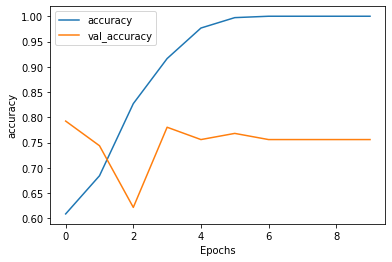

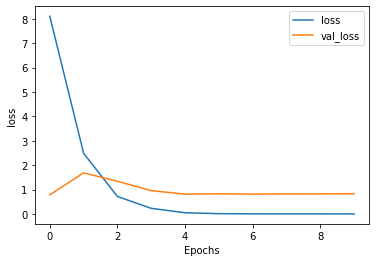

In [103]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")